# Final Project: Analysis of Heart Disease

# Overview
## 1: Introduction and Data Collection
- 1.1 Libraries
- 1.2 Data Used

## 2: Data Processing
- 2.1 Data Observations
- 2.2 Missing Values

## 3: Exploratory Data Analysis (EDA) & Visualization
- 3.1 Cleaning Missing Values and Analysing plots of Attributes: Insulin
- 3.2 Cleaning Missing Values and Analysing plots of Attributes: Glucose
- 3.3 Cleaning Missing Values and Analysing plots of Attributes: Blood Pressure
- 3.4 Cleaning Missing Values and Analysing plots of Attributes: Skin Thickness
- 3.5 Cleaning Missing Values and Analysing plots of Attributes: BMI
- 3.6 Analysing plots of Attributes: remaining attributes

## 4: Machine Learning

# 1 Introduction


Our main objective is to analyse the dataset of attributes related to diabetes and to predict whether that person is diabetic or not. We will be applying machine learning algorithms to try to achieve this goal. 

# HARSH ADD TO INTRO

### 1.1 Libraries:
These are the libraries used in this tutorial.

In [89]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification


### 1.2 Data Used
In the data collection stage of the data life cycle, you need to focus on collecting data from websites and databases. 

We have found data from Kaggle at: 
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

This data has all the attributes needed for predicting diabetes which will aid us to reach our final goal. The data is of 21 year old women at the Pima Indian Heritage. The data is organized with the folloing attributes as described by the website: 


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)




In [2]:
attributes = pd.read_csv("diabetes.csv")
attributes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


As you can see, from the data shown above each individual has an number id and has each attribute filled out.

Outcomes, the most important piece of data is the last column.

In [3]:
attributes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, there are 768 individual data points. There are some interesting points to how much the data points vary for example skin thickness can vary from 23 at the 50th percentile to 99 at the maximum. 

Other things to note is that there are no abnormal conditions seen outside of things expected to see in diabetics, for example the maximum blood preasure is 122 which is within a normal range and isnt considered to be harmful. 

In [4]:
attributes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now we have a more accurate representation of the data. 

# 2 Data Processing 
### 2.1 Data Observations 

# HARSH ADD TO ANALYSIS OF DATA WHERE YOU CAN

In [5]:
positive = attributes[attributes['Outcome']==1]
negative = attributes[attributes['Outcome']!=1]
positive.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1


In [6]:
def tar_sum(data, col, val): 
    return (data[col] == val).sum()
possum = tar_sum(attributes,"Outcome",1.0)
negsum = tar_sum(attributes,"Outcome",0.0)
total = possum + negsum
print("number of positive outcomes:")
print(possum)
print("percentage of positive outcomes:")
posperc= possum / total *100
print(posperc)
print()
print("number of negative outcomes:")
print(negsum)
print("percentage of negative outcomes:")
negperc = negsum / total *100
print(negperc)

number of positive outcomes:
268
percentage of positive outcomes:
34.89583333333333

number of negative outcomes:
500
percentage of negative outcomes:
65.10416666666666


### 2.2 missing values
when looking at our dataframe, we saw that some features contained 0s when they shouldn't and it doesnt make sense. We will replace these values with NaN. 

In [7]:
attributes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = attributes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [8]:
def plot_missing(data, key):
    null_feat = pd.DataFrame(len(data[key]) - data.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(data[key]) - (len(data[key]) - data.isnull().sum()))/len(data[key])*100, columns = ['Percent'])
    percentage_null = percentage_null.round(2)
    
    result = pd.concat([null_feat, percentage_null], axis=1, join='inner')
    result.plot(y='Percent',use_index=True, kind = 'bar')
    plot.title('Missing data percentage per attribute')
    plot.ylabel('Percent')
    plot.xlabel('Attribute')
    
    return result


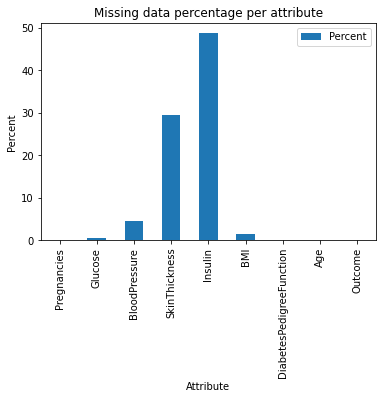

In [9]:
percent_missing = plot_missing(attributes, 'Outcome')

Using the boxplot below we can now see that we no longer have 0s for missing values. They are now encoded with NaN values. 

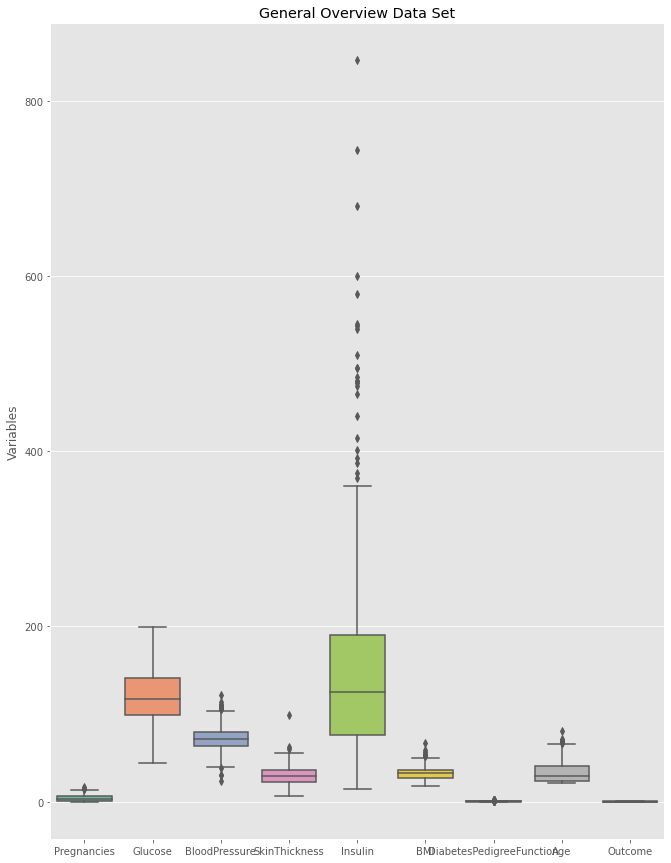

In [10]:
plot.style.use('ggplot') 
f, ax = plot.subplots(figsize=(11, 15))

ax.set(xlim=(-1, 200))
plot.ylabel('Variables')
plot.title("General Overview Data Set")
ax = sns.boxplot(data = attributes, orient = 'v', palette = 'Set2')

We now have a bunch of missing values that we need to fill. The missing data doesn't seem truly random as it isnt evenly spread among all attributes that has missing values. There isn't enough information on how this data was recorded so we cannot assume anything out of the ordinary so we need to assume that the values are missing at random (MAR). 

There are many different imputations but we will be using median imputation (similar to mean) since we have seen in how varied this data can be and the likely hood of outliers. 

# 3 Exploratory Data Analysis (EDA) & Visualization
This is the part of the pipeline called exploratory analysis. At this stage we want to observe any possible trends. We can apply statistical analysis to better support our observations and find evidence of the trends found.

In our case it is convienent to finish imputing variables while visualizing and doing EDA so we will be doing that here as well. We will look at the positive and negative results seperately at this point. We will not look at the combined data, ie both positive and negative data together, as we are looking for differences between the data and we need the two sets to be seperate. 

In [11]:
positive = attributes[attributes['Outcome']==1]
negative = attributes[attributes['Outcome']!=1]

In [12]:
def median_found(dataset, var):   
    temp = dataset[dataset[var].notnull()]
    tempmed = temp[var].median()
    return tempmed

## 3.1 Insulin
We will be looking at insulin first to find the median those who tested positive and those who tested negative. As we can see from the table labeled Insulin of a diabetic person, most patients are in the range between 0 and 650.

Comparitavely, the insulin of a healthy person is typically between 0 and 500 which gives a smaller range of values. It also peaks around 100 and tapers off much faster than the positive results. 

/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Insulin of a healthy person'), Text(0.5, 0, 'Insulin')]

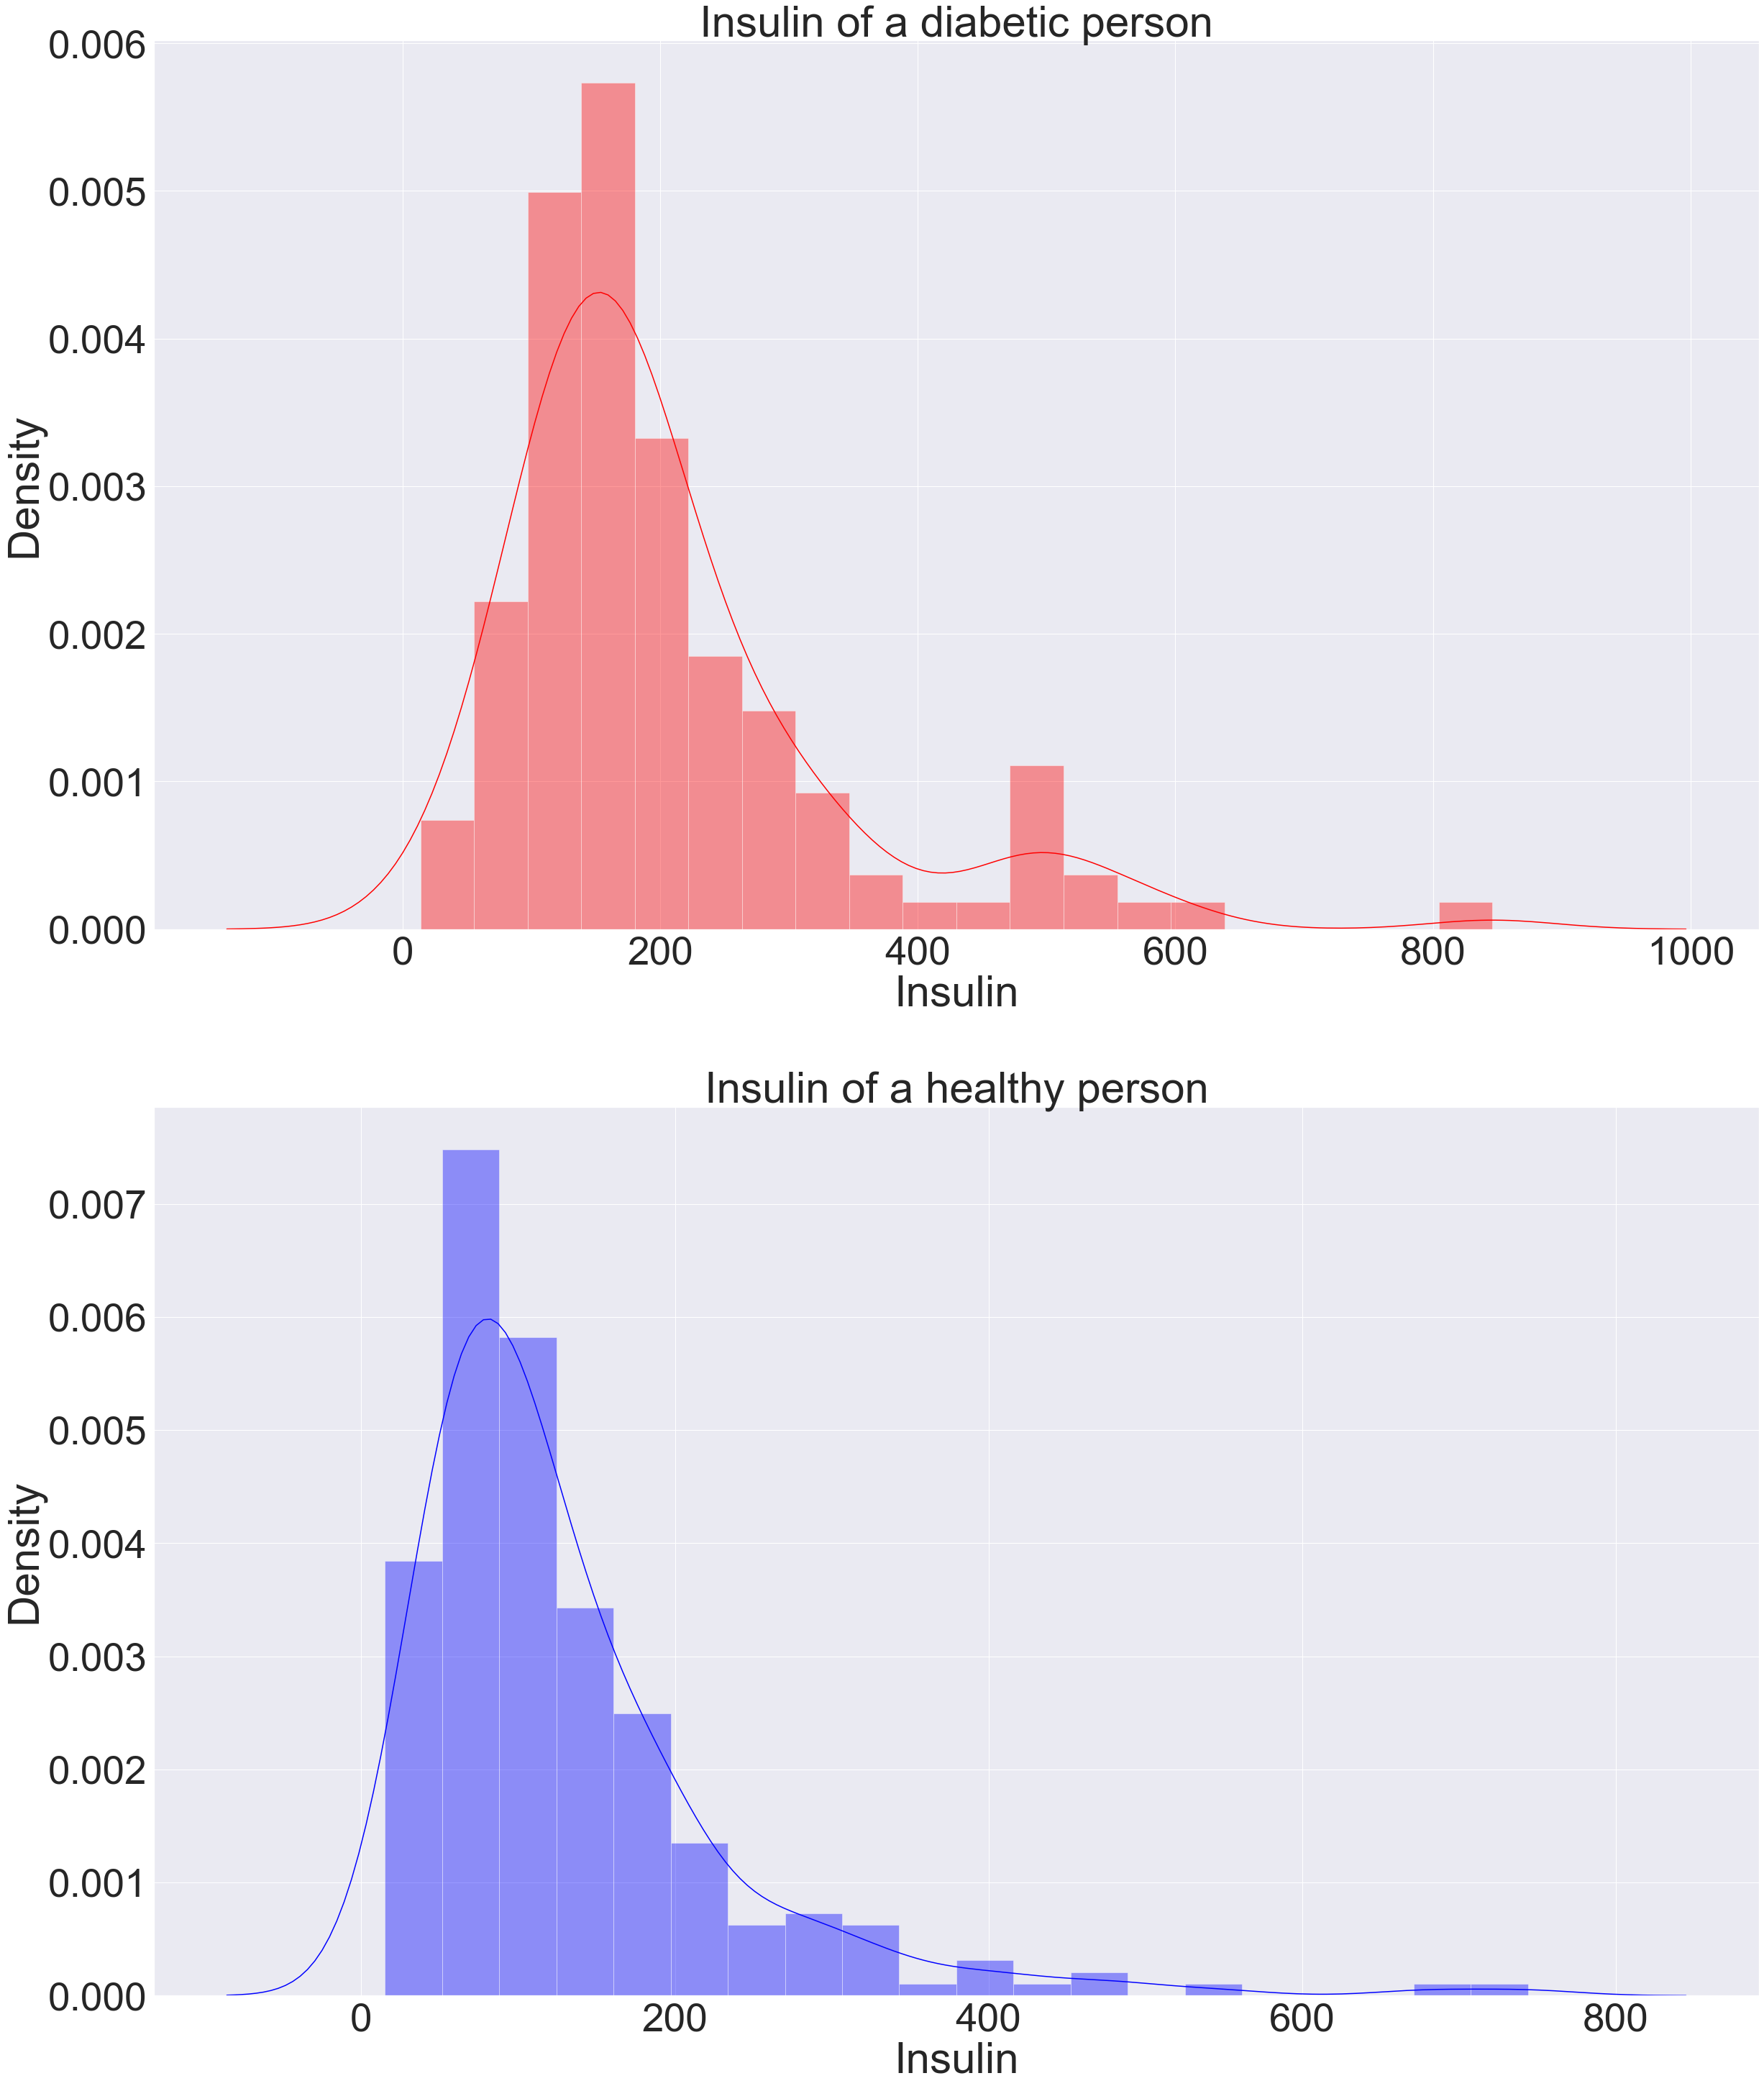

In [31]:
fig, ax = plot.subplots(2,1, figsize=(40,50))
sns.set(font_scale=5)

sns.distplot(positive['Insulin'], bins = 20, color = 'red', \
             ax=ax[0]).set(title='Insulin of a diabetic person', xlabel = 'Insulin')
sns.distplot(negative['Insulin'], bins = 20, color = 'blue', \
             ax=ax[1]).set(title='Insulin of a healthy person', xlabel = 'Insulin')


In [14]:
insulin_median = median_found(positive, 'Insulin')
print("positive diagnosed median:")
print(insulin_median)

positive diagnosed median:
169.5


In [15]:
insulin_median = median_found(negative, 'Insulin')
print("negative diagnosed median:")
print(insulin_median)

negative diagnosed median:
102.5


As we can see there is a drastic change in insulin between a healthy person and unhealthy person. A health person has a median of 102.5 and an unhealthy person has a median of 169.5. 

Now we will median fill the missing values with their respective group (Diabetic or Healthy).

In [16]:
attributes.loc[(attributes['Outcome'] == 0 ) & (attributes['Insulin'].isnull()), 'Insulin'] = 102.5
attributes.loc[(attributes['Outcome'] == 1 ) & (attributes['Insulin'].isnull()), 'Insulin'] = 169.5

## 3.2 Glucose
Now we need to move on to other attributes with missing values and do the same for them. 

Below we have plotted the glucose data in the same manner as we did Insulin. The positive diabetic glucose information is almost consistent between 75 and 200. It seems to peak at 125 and tapers of at a low rate. Comparatively, the glucose of a normal person peaks at 100 and tapers off at a high rate.

/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Glucose of a healthy person'), Text(0.5, 0, 'Glucose')]

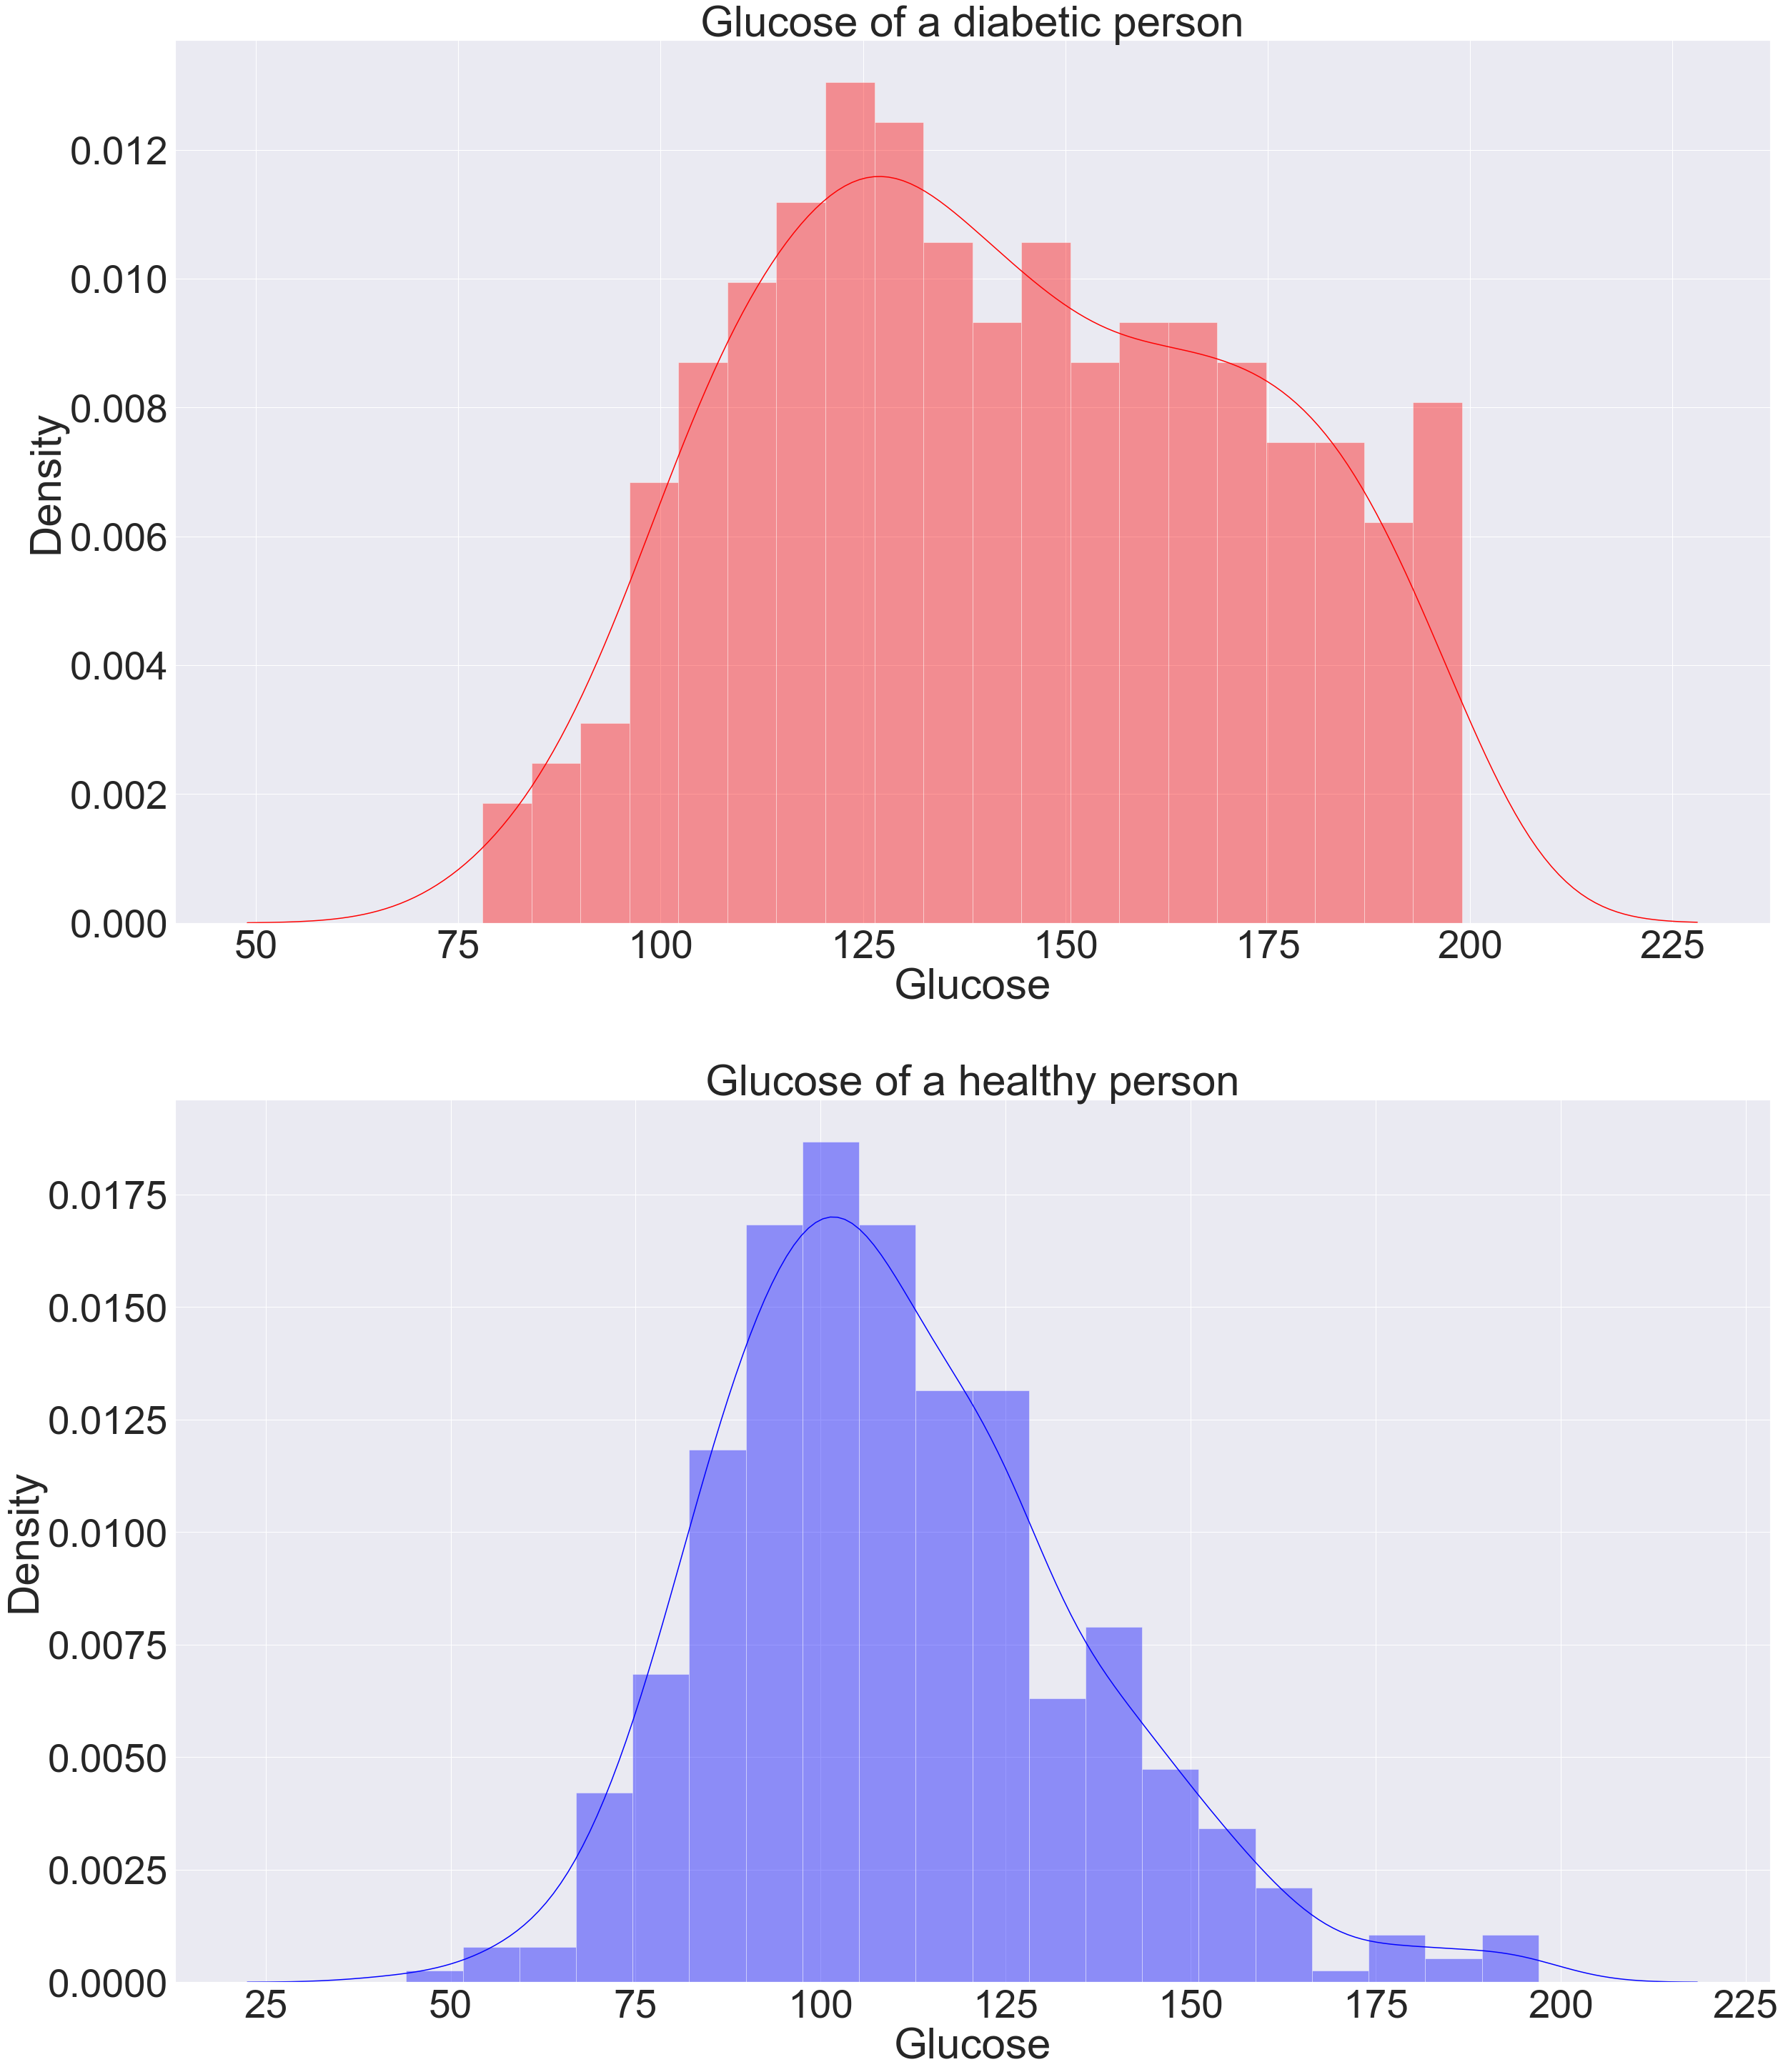

In [17]:
fig, ax = plot.subplots(2,1, figsize=(40,50))
sns.set(font_scale=5)

sns.distplot(positive['Glucose'], bins = 20, color = 'red', \
             ax=ax[0]).set(title='Glucose of a diabetic person', xlabel = 'Glucose')
sns.distplot(negative['Glucose'], bins = 20, color = 'blue', \
             ax=ax[1]).set(title='Glucose of a healthy person', xlabel = 'Glucose')


In [18]:
insulin_median = median_found(positive, 'Glucose')
print("positive diagnosed median:")
print(insulin_median)

positive diagnosed median:
140.0


In [19]:
insulin_median = median_found(negative, 'Glucose')
print("negative diagnosed median:")
print(insulin_median)

negative diagnosed median:
107.0


In [20]:
attributes.loc[(attributes['Outcome'] == 0 ) & (attributes['Glucose'].isnull()), 'Glucose'] = 107.0
attributes.loc[(attributes['Outcome'] == 1 ) & (attributes['Glucose'].isnull()), 'Glucose'] = 140.0

## 3.3 Blood Pressure
We will now move on to Blood Pressure.

/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'BloodPressure of a healthy person'),
 Text(0.5, 0, 'BloodPressure')]

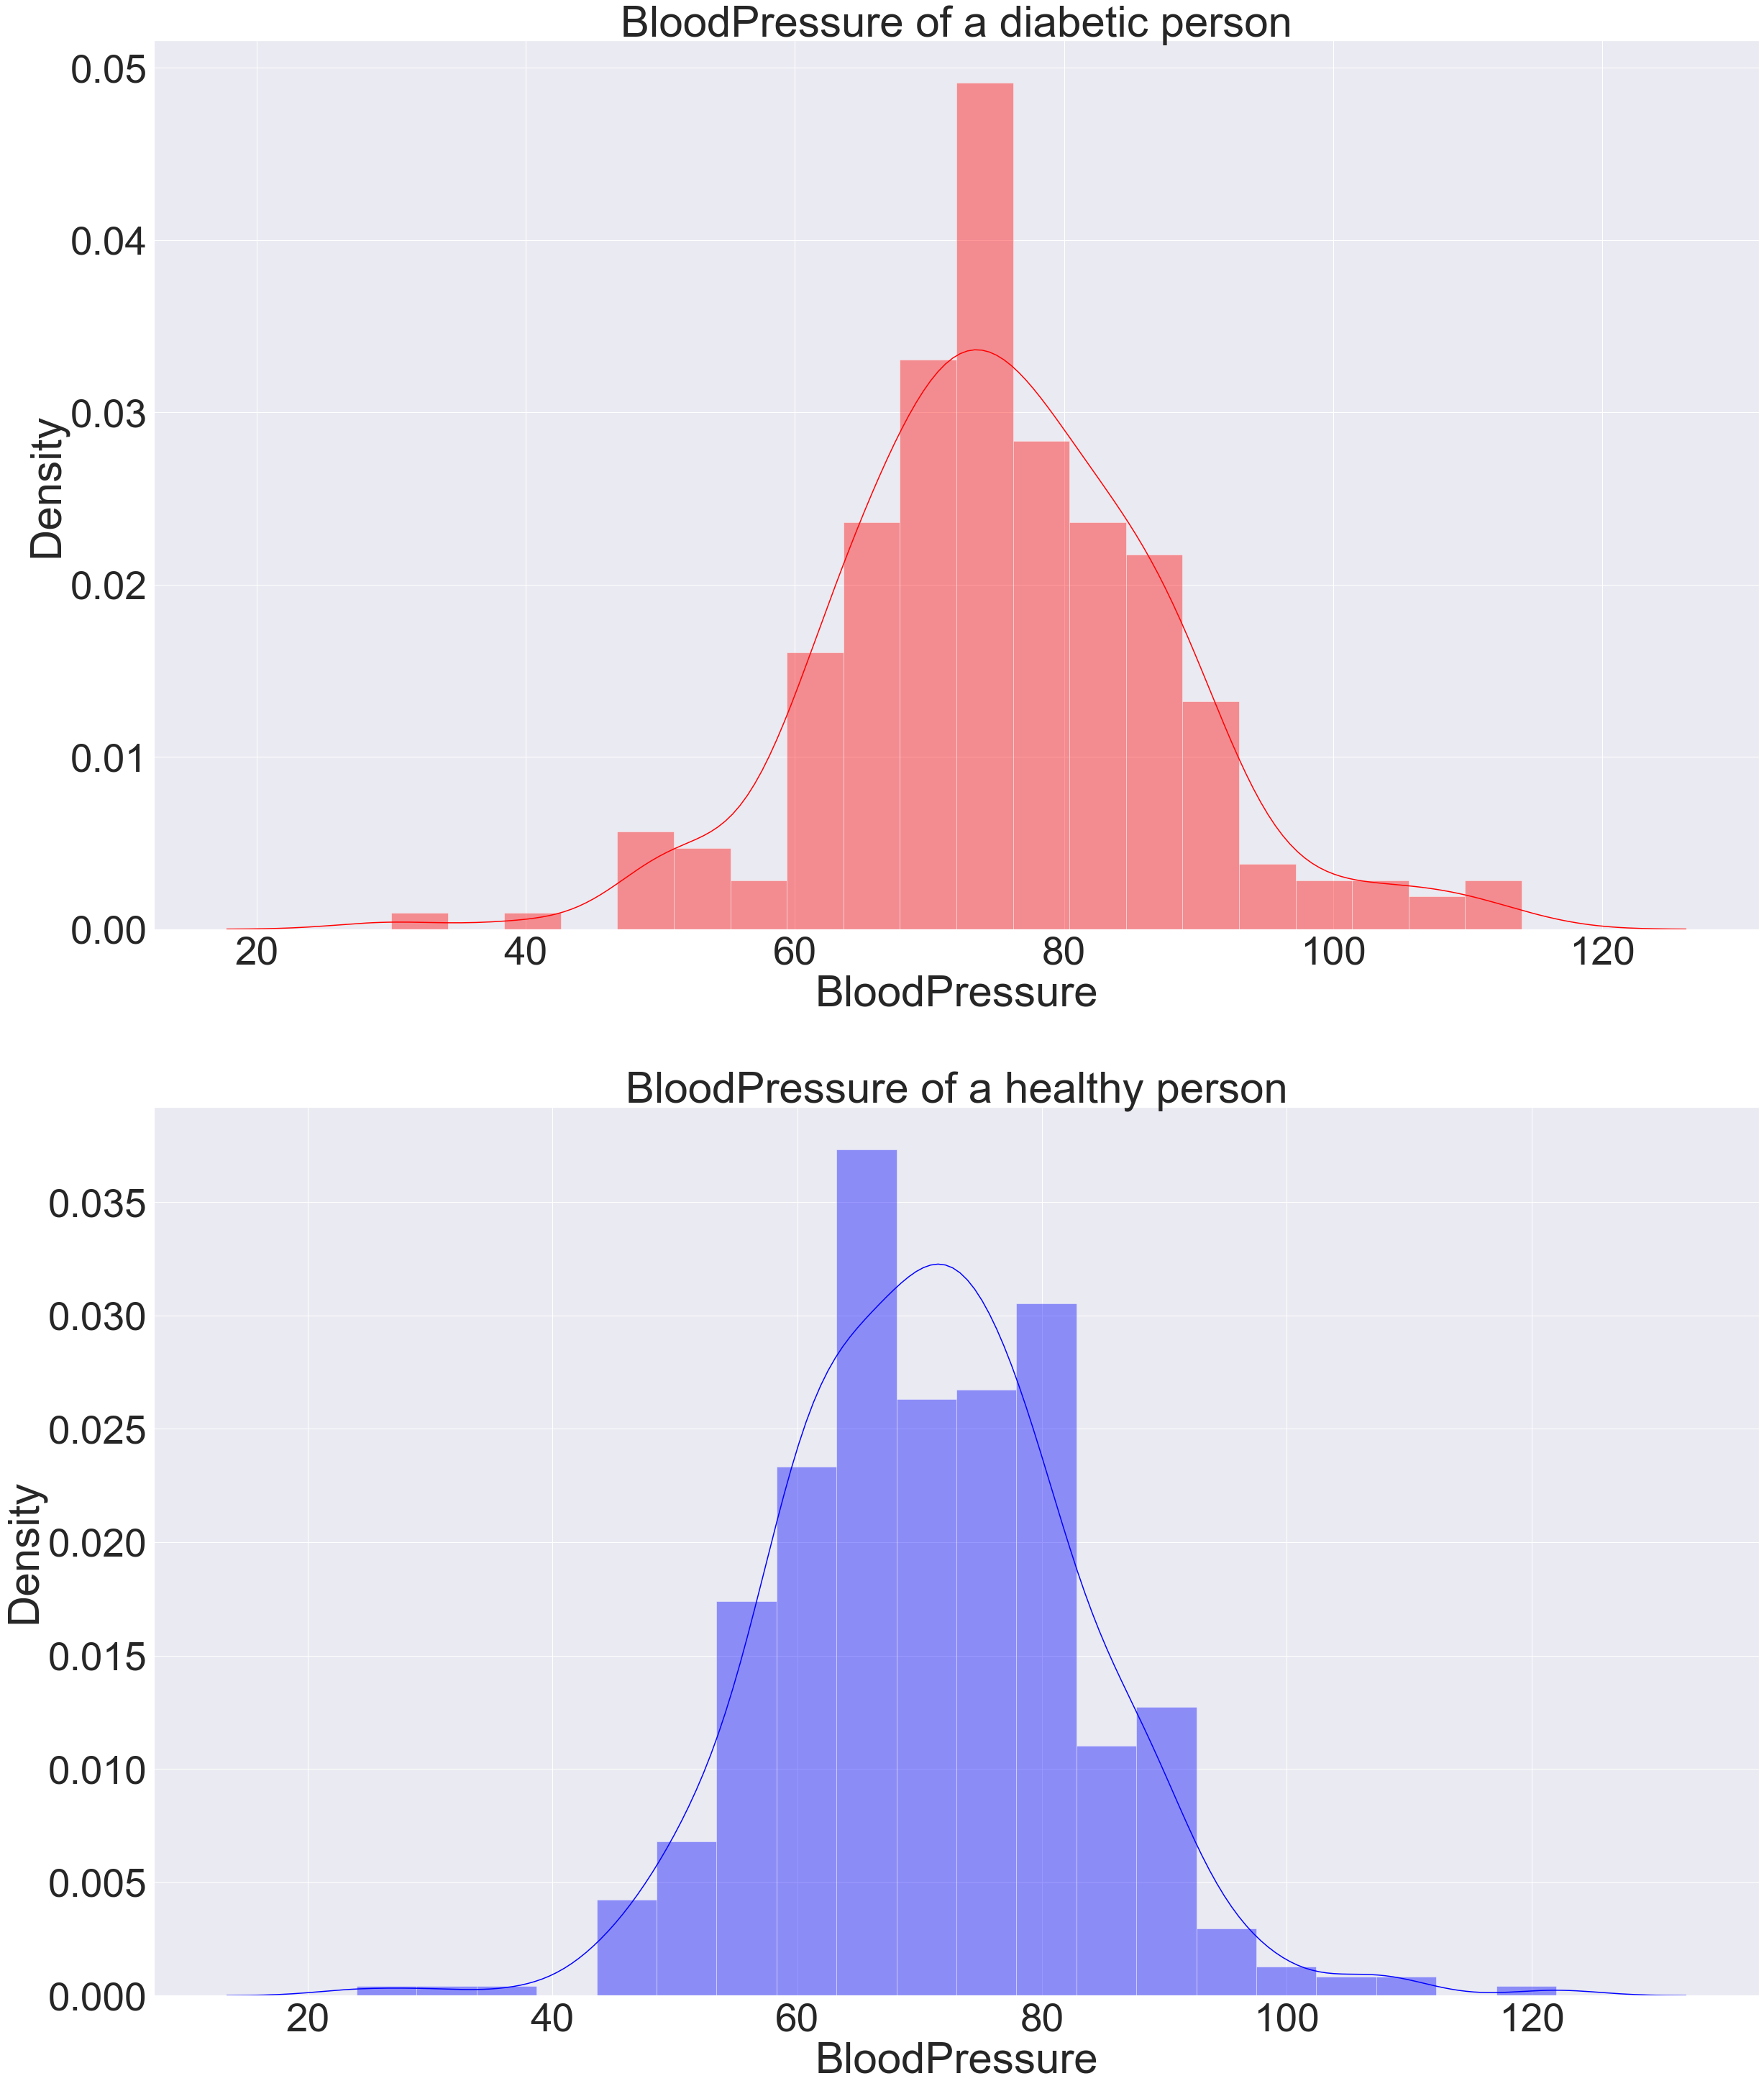

In [21]:
fig, ax = plot.subplots(2,1, figsize=(40,50))
sns.set(font_scale=5)

sns.distplot(positive['BloodPressure'], bins = 20, color = 'red', \
             ax=ax[0]).set(title='BloodPressure of a diabetic person', xlabel = 'BloodPressure')
sns.distplot(negative['BloodPressure'], bins = 20, color = 'blue', \
             ax=ax[1]).set(title='BloodPressure of a healthy person', xlabel = 'BloodPressure')


In [22]:
insulin_median = median_found(positive, 'BloodPressure')
print("positive diagnosed median:")
print(insulin_median)

positive diagnosed median:
74.5


In [23]:
insulin_median = median_found(negative, 'BloodPressure')
print("negative diagnosed median:")
print(insulin_median)

negative diagnosed median:
70.0


In [24]:
attributes.loc[(attributes['Outcome'] == 0 ) & (attributes['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
attributes.loc[(attributes['Outcome'] == 1 ) & (attributes['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SkinThickness of a healthy person'),
 Text(0.5, 0, 'SkinThickness')]

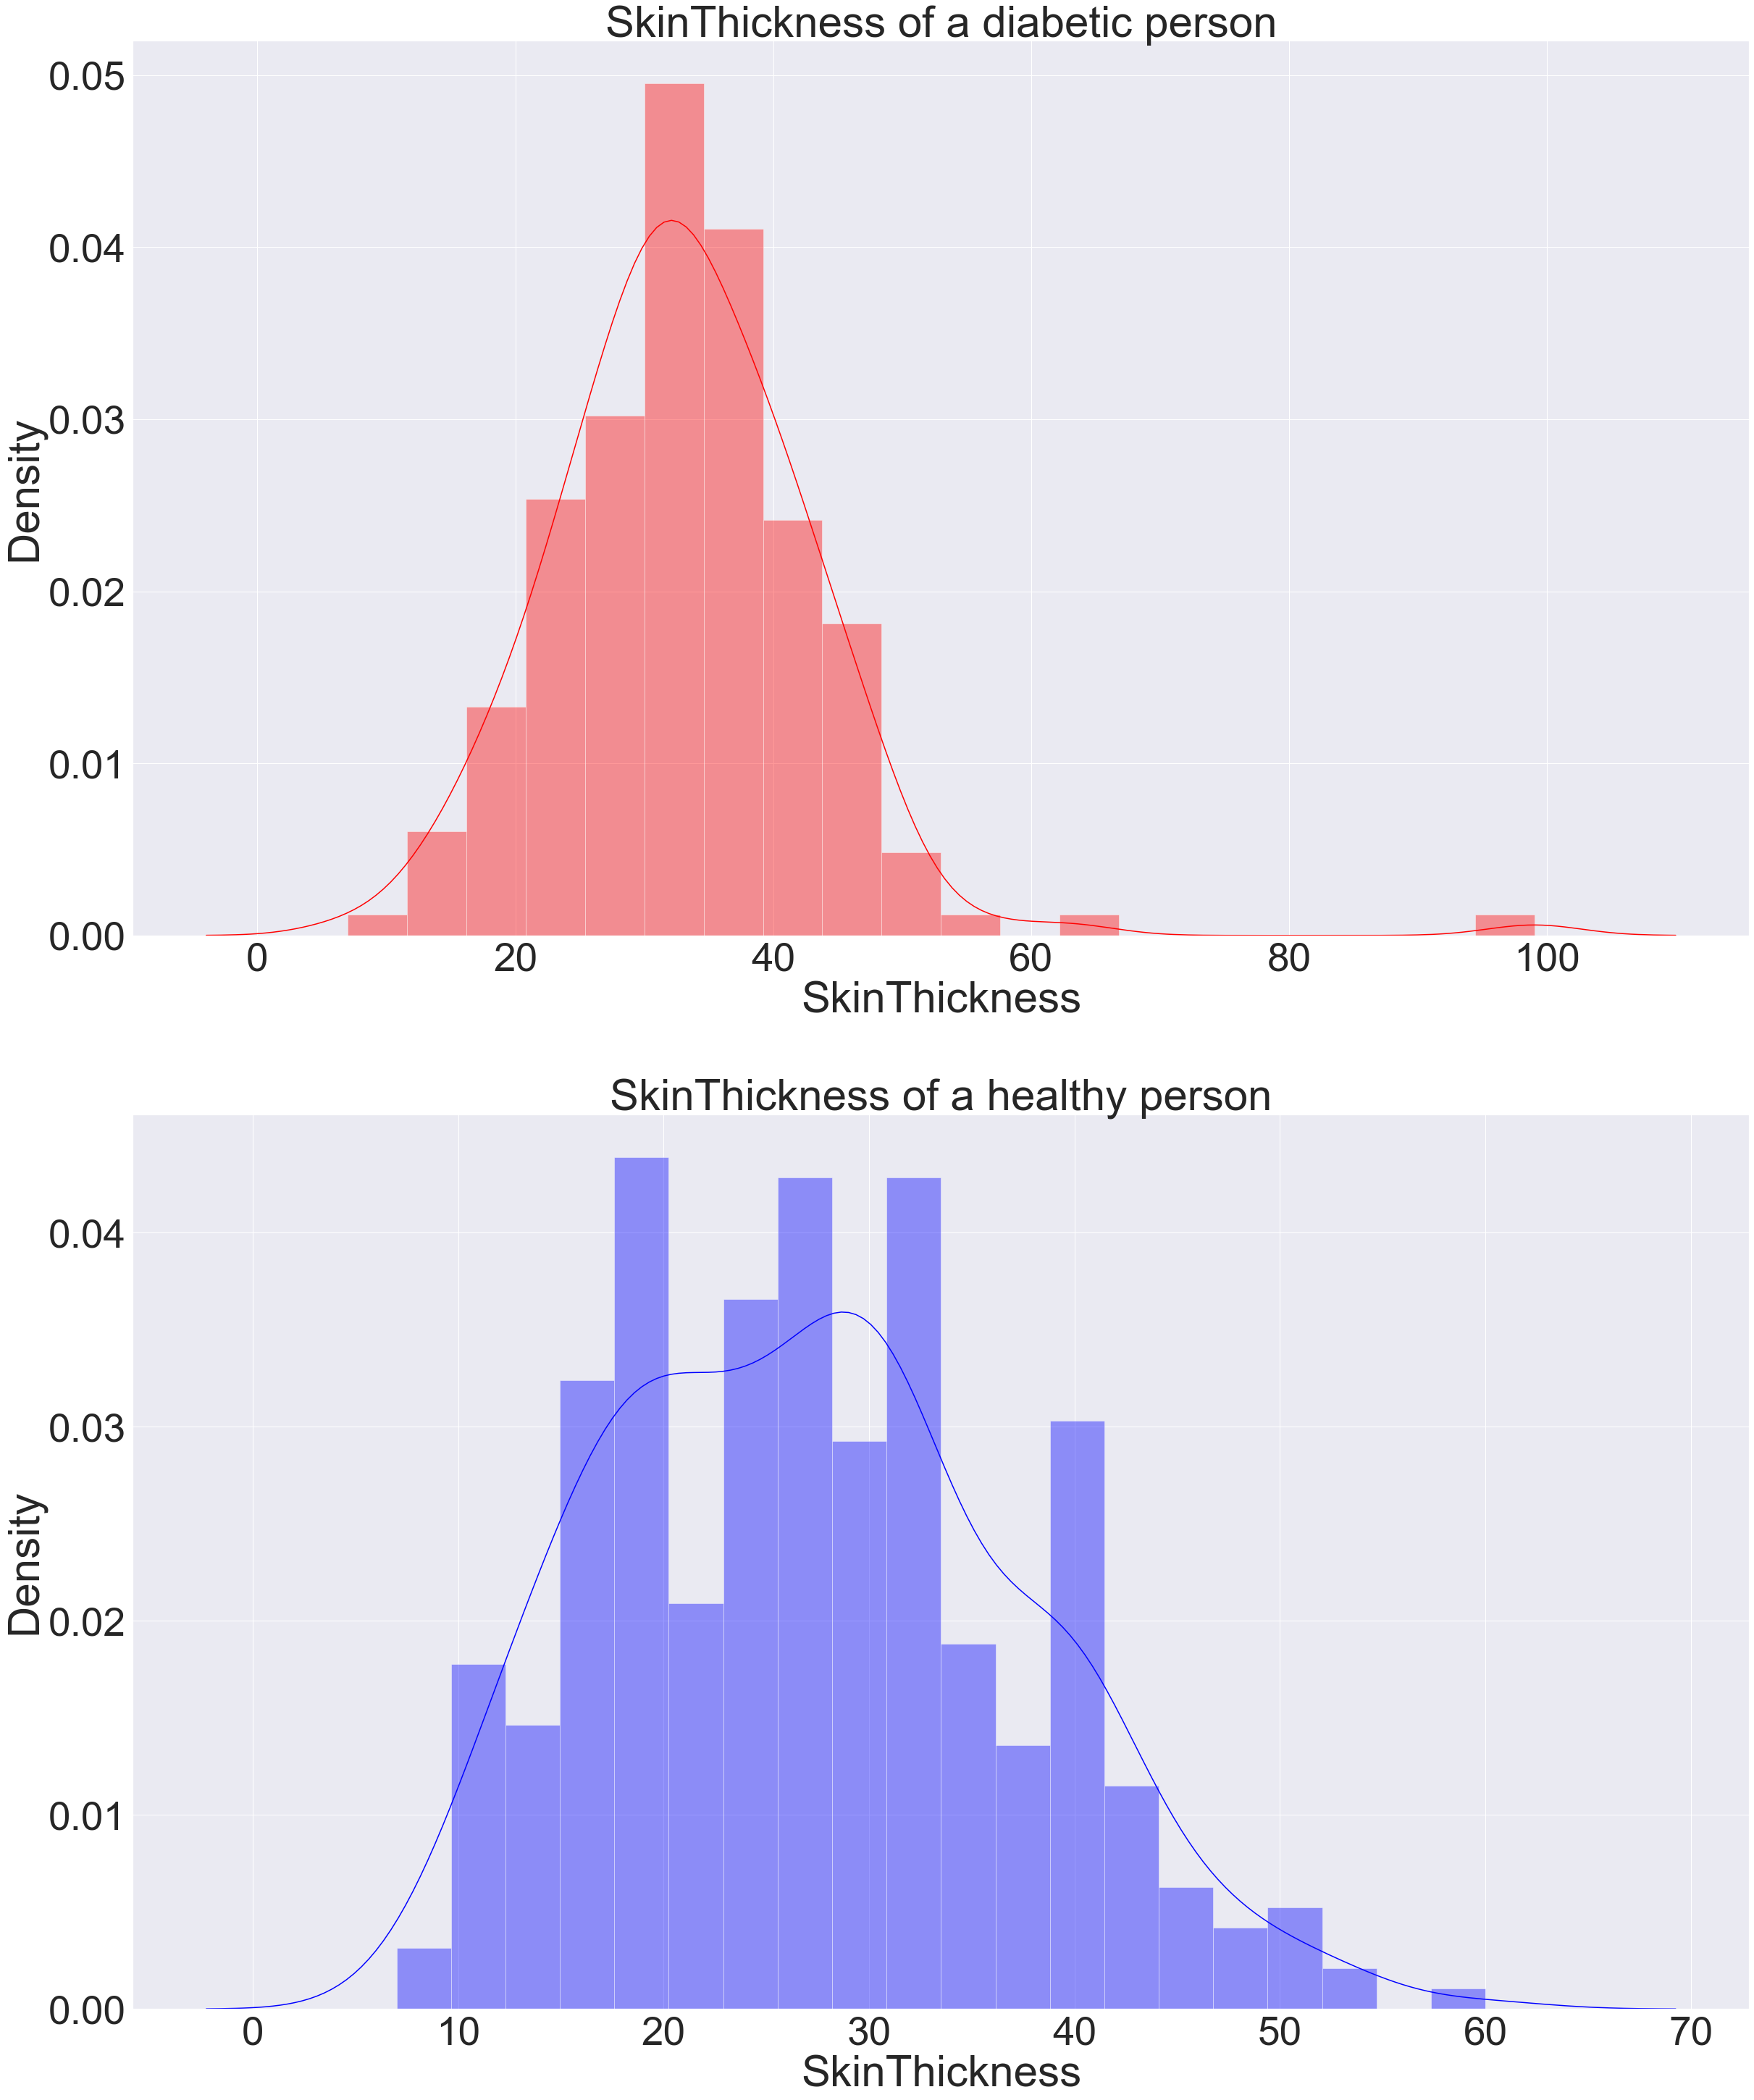

In [30]:
fig, ax = plot.subplots(2,1, figsize=(40,50))
sns.set(font_scale=5)

sns.distplot(positive['SkinThickness'], bins = 20, color = 'red', \
             ax=ax[0]).set(title='SkinThickness of a diabetic person', xlabel = 'SkinThickness')
sns.distplot(negative['SkinThickness'], bins = 20, color = 'blue', \
             ax=ax[1]).set(title='SkinThickness of a healthy person', xlabel = 'SkinThickness')


In [26]:
insulin_median = median_found(positive, 'SkinThickness')
print("positive diagnosed median:")
print(insulin_median)

positive diagnosed median:
32.0


In [27]:
insulin_median = median_found(negative, 'SkinThickness')
print("negative diagnosed median:")
print(insulin_median)

negative diagnosed median:
27.0


In [28]:
attributes.loc[(attributes['Outcome'] == 0 ) & (attributes['BloodPressure'].isnull()), 'BloodPressure'] = 27.0
attributes.loc[(attributes['Outcome'] == 1 ) & (attributes['BloodPressure'].isnull()), 'BloodPressure'] = 32.0


/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alessandro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'BMI of a healthy person'), Text(0.5, 0, 'BMI')]

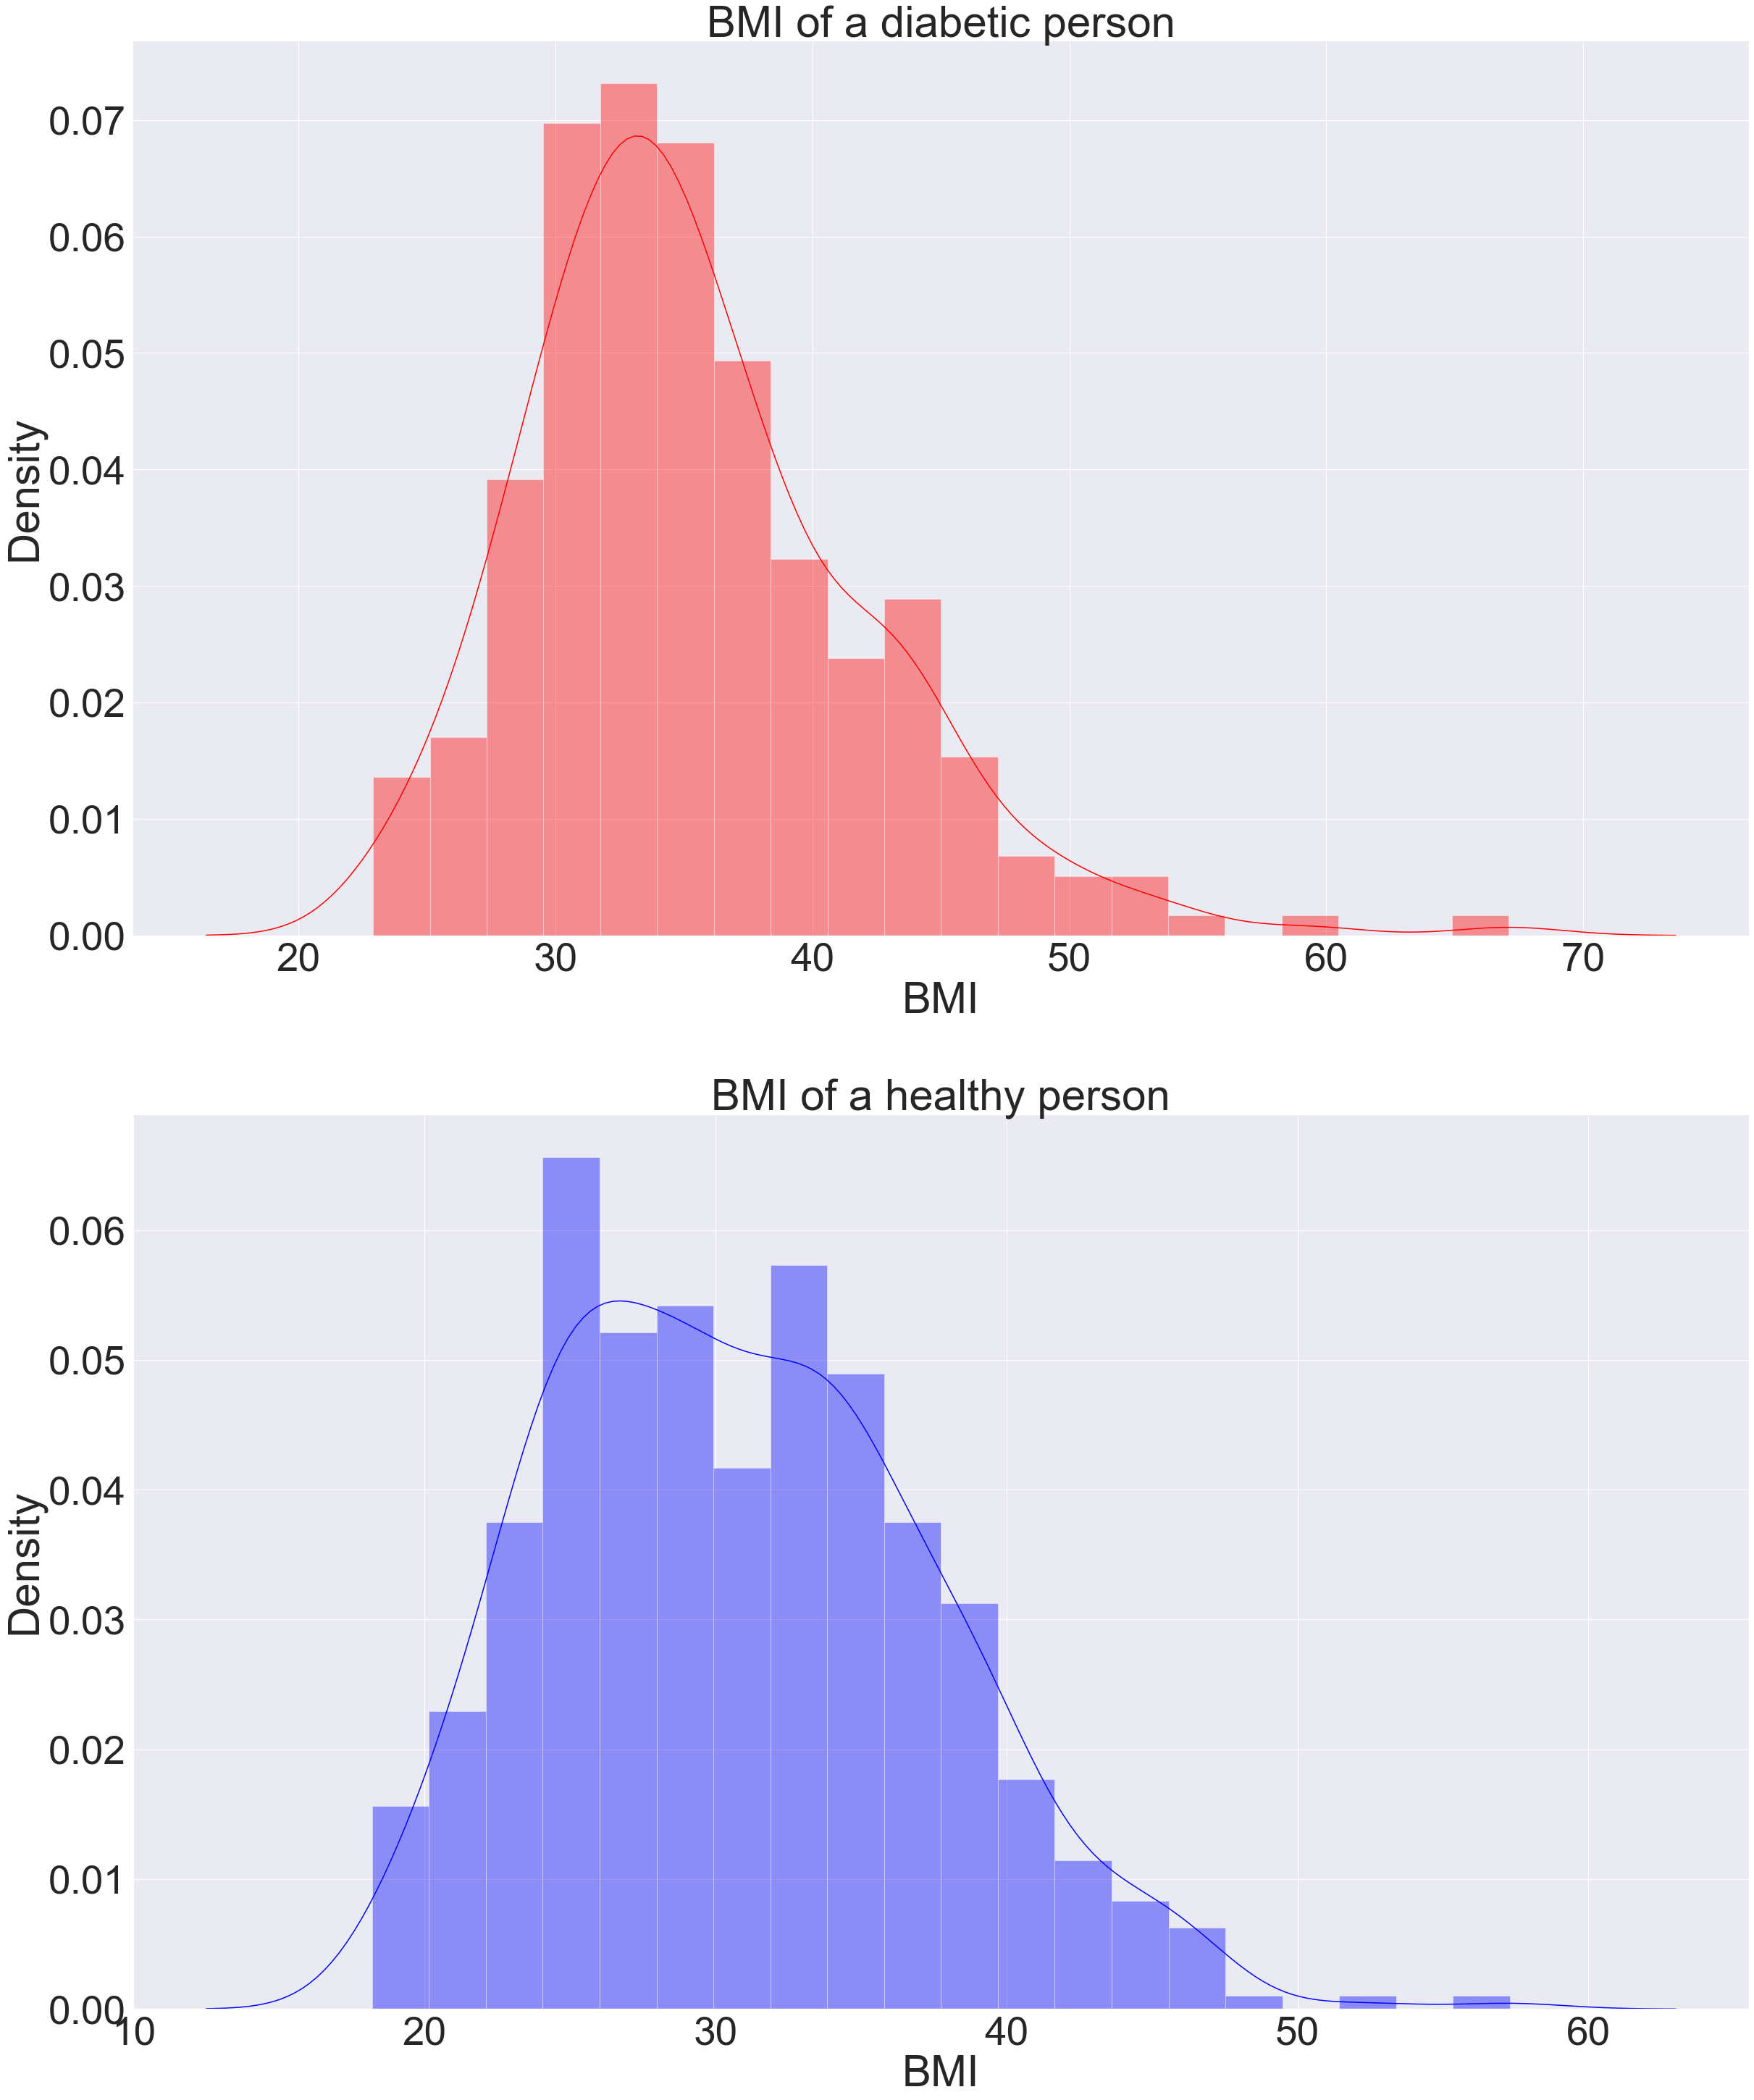

In [32]:
fig, ax = plot.subplots(2,1, figsize=(40,50))
sns.set(font_scale=5)

sns.distplot(positive['BMI'], bins = 20, color = 'red', \
             ax=ax[0]).set(title='BMI of a diabetic person', xlabel = 'BMI')
sns.distplot(negative['BMI'], bins = 20, color = 'blue', \
             ax=ax[1]).set(title='BMI of a healthy person', xlabel = 'BMI')


In [35]:
insulin_median = median_found(positive, 'BMI')
print("positive diagnosed median:")
print(insulin_median)

positive diagnosed median:
34.3


In [36]:
insulin_median = median_found(negative, 'BMI')
print("negative diagnosed median:")
print(insulin_median)

negative diagnosed median:
30.1


In [38]:
attributes.loc[(attributes['Outcome'] == 0 ) & (attributes['BMI'].isnull()), 'BMI'] = 27.0
attributes.loc[(attributes['Outcome'] == 1 ) & (attributes['BMI'].isnull()), 'BMI'] = 32.0


# Analysis of remaining Attributes

# HARSH FINISH ANALYSIS, Comment the graphs and plots 

In [ ]:
# analysis of age, pregnancy, ... 

Lets take a quick look at the confusion matrix to see if we can find the highest correlations.

<AxesSubplot:>

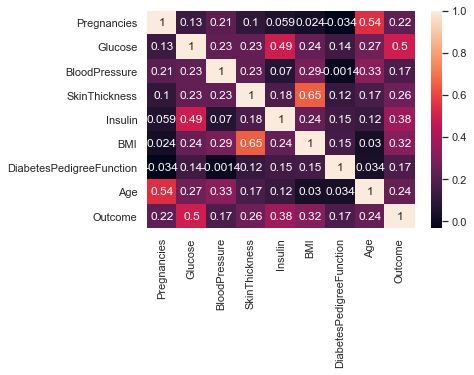

In [52]:
sns.set(font_scale=1)
corr = attributes.corr()
sns.heatmap(corr, annot = True)

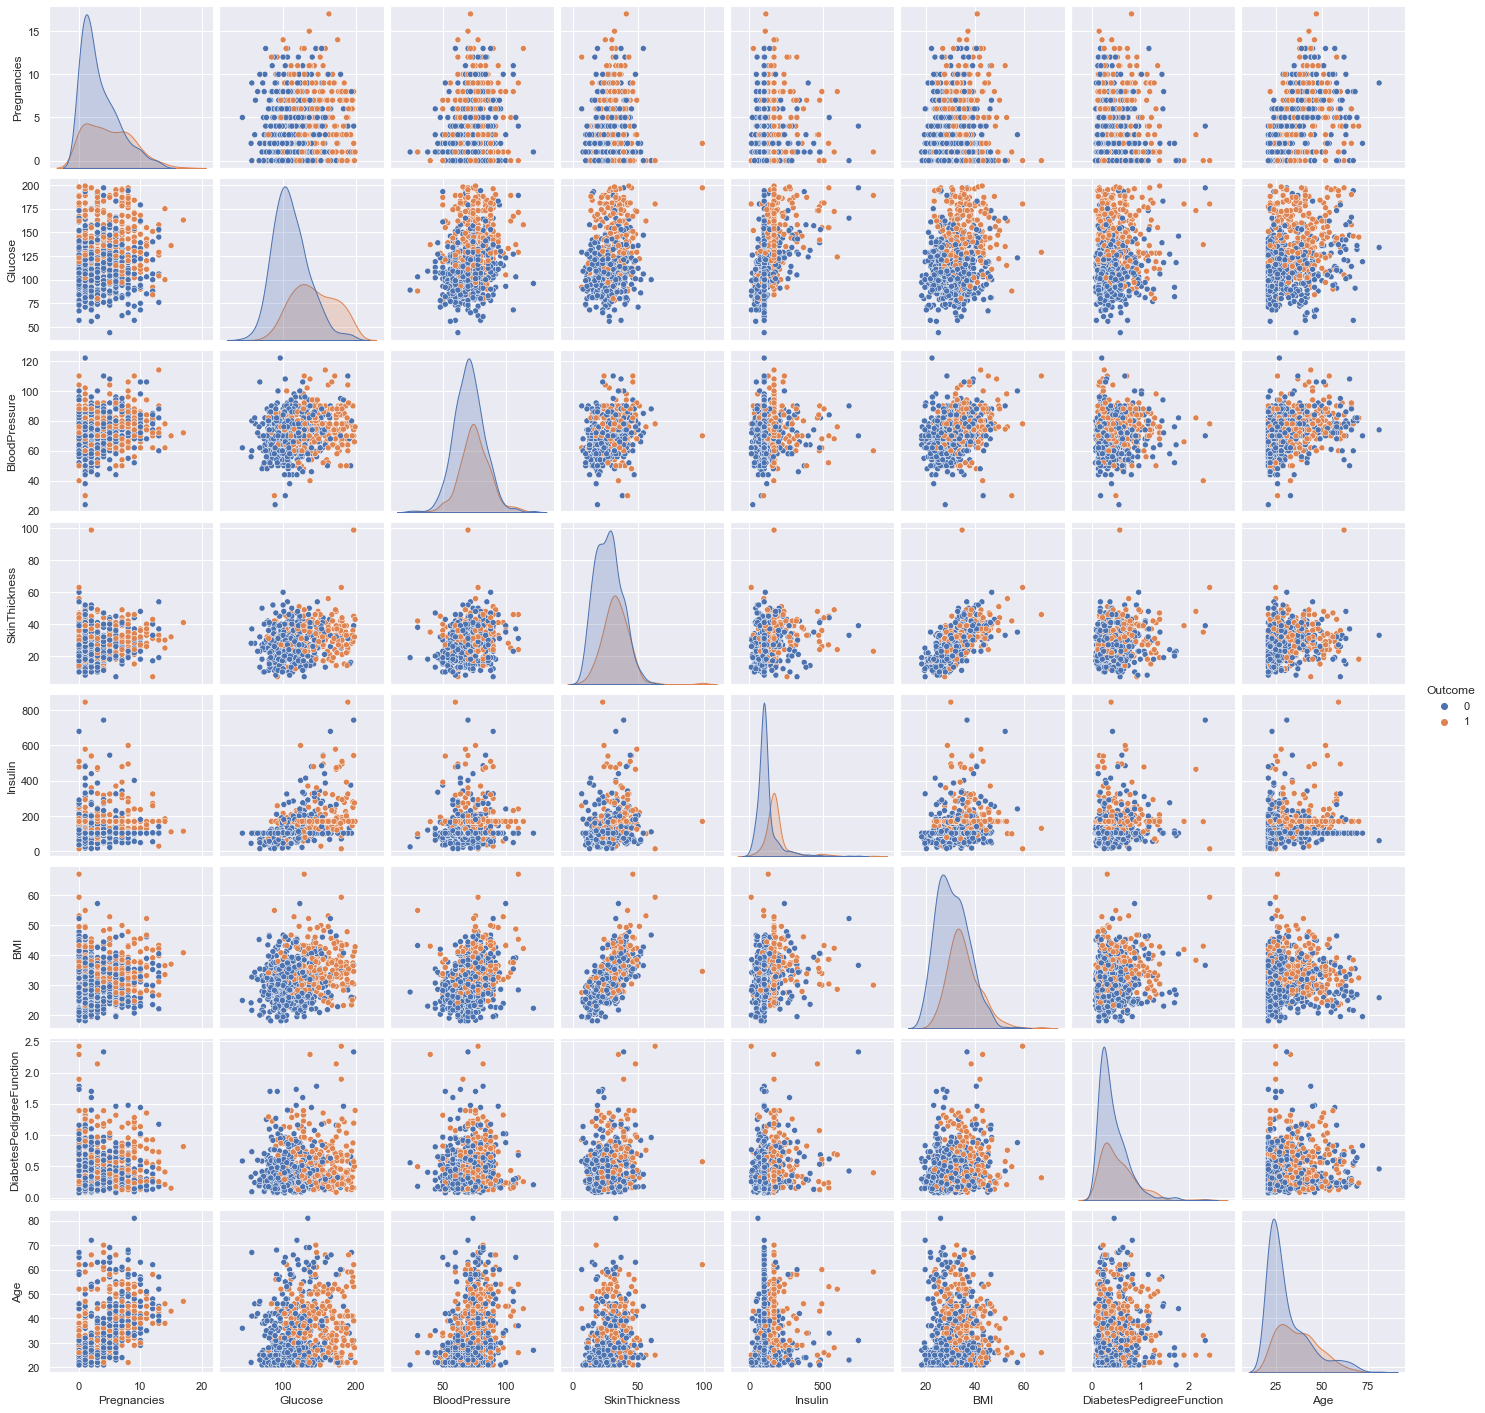

In [68]:
sns.pairplot(attributes, hue='Outcome') 

Seemingly the highest correlation there is is between the Skin thickness and BMI. This is a moderate correlation and the closest one to it would be age and pregnancies. 

# 4: Machine Learning

# HARSH CAN YOU EXPLAIN EACH LEARNING ALGORITHM

### 4.1 Learning algorithms used: 

### 4.2 Normalization and Train/Test Split

In [47]:
X = attributes[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
y = attributes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 7)
(614,)
(154, 7)
(154,)


### 4.3 Linear Discriminant Analysis (LDA) 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 15)


model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy for LDA by train/test split:")
print(accuracy_score(y_test, y_pred))

cv = KFold(n_splits=10,random_state= 1, shuffle = True)
cv_results = cross_val_score(model, X, y, cv = cv, scoring = 'accuracy', n_jobs=-1)
print("Accuracy for LDA using 10-fold cross validation:")
print(cv_results.mean())


#linear SVM

#Non Linear SVM

Accuracy for LDA by train/test split:
0.7792207792207793
Accuracy for LDA using 10-fold cross validation:
0.781185919343814


### 4.4 Random Forest

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10)
rfc = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rfc.fit(X_train, y_train),
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8831168831168831

<AxesSubplot:>

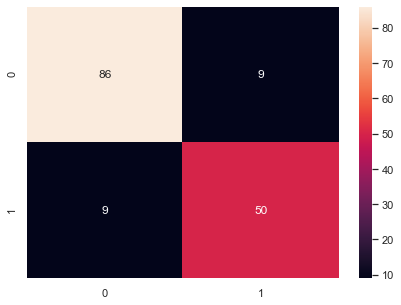

In [77]:
mat = confusion_matrix(y_test, y_pred)
plot.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

In [93]:
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

cv = KFold(n_splits=10,random_state= 1, shuffle = True)
cv_results = cross_val_score(rfc, X, y, cv = cv, scoring = 'accuracy', n_jobs=-1)

print("Accuracy for Random Forest using 10-fold cross validation:")
print(cv_results.mean())

              precision    recall  f1-score   support

    Diabetes       0.69      0.61      0.65       108
      Normal       0.29      0.37      0.32        46

    accuracy                           0.54       154
   macro avg       0.49      0.49      0.49       154
weighted avg       0.57      0.54      0.55       154

Accuracy for Random Forest using 10-fold cross validation:
0.882740943267259


### 4.5 Decision Tree
For this learnin algorithm we will be applying all attributes to the model. In general, a decision tree consists of many paths nodes that originate from the root of the tree. These paths go through different nodes at whcih a decision is made that will determine where to go next. 

In our case, we want to classify whether a person does or doesnt have diabetes so we want the tree to split the inputted data continously in order to correctly predict categories that a datapoint would fall under. In our case we will not be using a regression for our decision tree as we do not need it to predict a value for an attribute but simply determine whether a certain set of values mean diabetes or not. 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)
dtc = dtc.fit(X_train,y_train)

# now predict the value
y_hat = dtc.predict(X_test)


In [62]:
accuracy_score(y_hat,y_test)

0.8701298701298701

[Text(155.98636363636365, 195.696, 'X[3] <= 121.0\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(76.0909090909091, 152.208, 'X[1] <= 151.5\ngini = 0.133\nsamples = 336\nvalue = [312, 24]'),
 Text(45.654545454545456, 108.72, 'X[4] <= 50.9\ngini = 0.096\nsamples = 318\nvalue = [302, 16]'),
 Text(30.436363636363637, 65.232, 'X[0] <= 14.0\ngini = 0.09\nsamples = 317\nvalue = [302, 15]'),
 Text(15.218181818181819, 21.744, 'gini = 0.085\nsamples = 316\nvalue = [302, 14]'),
 Text(45.654545454545456, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(60.872727272727275, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(106.52727272727273, 108.72, 'X[6] <= 36.0\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(91.30909090909091, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(121.74545454545455, 65.232, 'X[0] <= 11.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(106.52727272727273, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(136.96

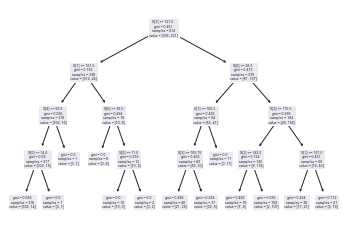

In [66]:
#display decision tree
tree.plot_tree(dtc)